In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

In [220]:
data1=pd.read_csv('survey_results_public.csv', sep=",", header=0)


In [216]:
# This read the column for the language worked with and the job title type.
dd=data1[['DevType','LanguageWorkedWith']]
ndd=dd.dropna().reset_index().drop('index',axis=1)


In [217]:
job_title=data1['DevType'].value_counts().reset_index()


#### This section map the job title with the language the respondents have worked with. The first part seperated the job titles and the second part now map each title to the language being use by people with that title, before we now count the number of each  languages with respect to the titles.

In [263]:
from collections import Counter
import functools
import operator

def split_data(column_name1,
               column_name2,
               schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    
    newarray=[]
    
    for index in range(schema.shape[0]):
        
        desc=schema[column_name1][index].split(';')
        
        for i in range(len(desc)):
            newarray.append({desc[i].strip():
                             schema[column_name2][index]})
            
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Job Type', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False)
Job_df=split_data('index','DevType',job_title)
#Job_df

In [264]:
from collections import Counter
import functools
import operator

def split_data(column_name1,
               column_name2,
               schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    newarray=[]
    
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        
        for i in range(len(desc)):
            newarray.append({desc[i].strip():
                             schema[column_name2][index]})
#    print(newarray)
    return newarray
'''
    OUTPUT:
    The output consist of a list of dictionaries, with the job titles as the key and the programming languages as the value

    '''
newdata=split_data('DevType','LanguageWorkedWith',ndd)
#newdata

In [268]:
def merge_list_of_dictionaries(dict_list):
    '''
    
    Descrips - It takes in a dictionary, where the value per key contains different numbers of list. It join the
    lists to form a single one and seperate the items with a semi-colon.
    It produces a dataframe as the output.

    '''
    
    new_dict = {}
    
    for d in dict_list:
        for d_key in d:
            if d_key not in new_dict:
                new_dict[d_key] = []
                
            new_dict[d_key].append(d[d_key])
            
    for d in new_dict:
        d=d.strip()
        new_dict[d]=(';'.join(new_dict[d])) 
    rr= pd.DataFrame.from_dict(new_dict, orient='index').reset_index()   
    return rr

new_df=merge_list_of_dictionaries(newdata)
new_df.columns=['Job Title', 'Programming Type']
#new_df

In [202]:

def Job_Title(job,job_column,
              prog_column,
              index_no,database):
    
    '''
    descrips - should be a set of the job title you want to consider, the column name for all the job title,
    column name for the programming types, the index number of the job title consider and the dataset 
    '''
    cc=database[(database[job_column]==job)]
    uu=cc[prog_column].str.split(';')
    key=[]
    value=[]
    for i in set(uu[index_no][:]):
    
        count=0
        for element in uu[index_no][:]:
            if i ==element:
                count+=1
        key.append(i)        
        value.append(count)
    ola=dict(zip(key,value))
    appro=pd.DataFrame.from_dict(ola, orient='index').reset_index()
    
    appro.columns=['Programming Type', 'Count']
    appro=appro.sort_values(by=['Count'],ascending=False)
    return appro

In [137]:
Developer_front_end=Job_Title('Developer, front-end',
                              'Job Title',
                              'Programming Type',
                              1,new_df)

Developer_back_end=Job_Title('Developer, back-end',
                             'Job Title','Programming Type'
                             ,3,new_df)

Developer_full_stack=Job_Title('Developer, full-stack',
                               'Job Title','Programming Type'
                               ,4,new_df)

Developer_desktop_enterprise_applications=Job_Title('Developer, desktop or enterprise applications',
                                                    'Job Title','Programming Type',
                                                    0,new_df)

#### Plot for the distribution of the programing languages base on the job titles.

<ipython-input-242-329a759dfeed>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
<ipython-input-242-329a759dfeed>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
<ipython-input-242-329a759dfeed>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
<ipython-input-242-329a759dfeed>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90,)


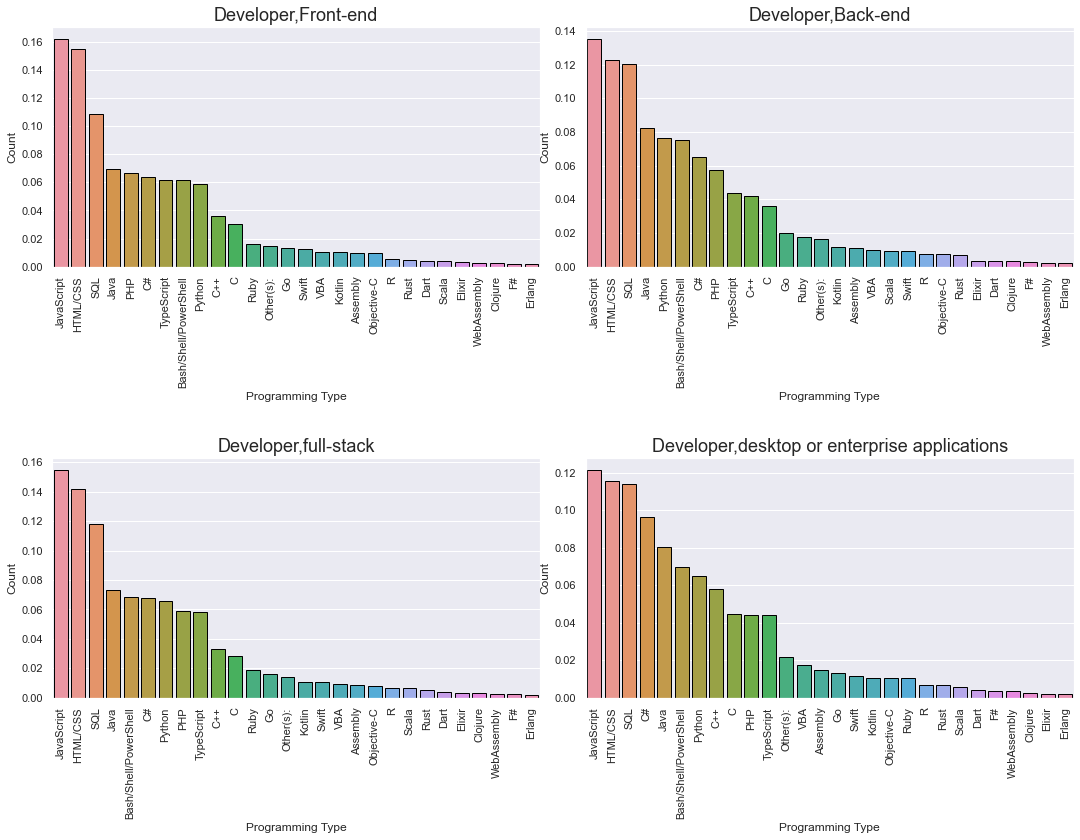

In [242]:
sns.set()
fig, axes = plt.subplots(2, 2,figsize=(15,10),sharey=False,sharex=False)
plt.tight_layout(h_pad=14.0)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
axes[0,0].set_title('Developer,Front-end', fontsize=18)
sns.barplot(ax=axes[0,0],x=Developer_front_end['Programming Type'], 
            y=Developer_front_end['Count']/sum(Developer_front_end['Count']),
            data=Developer_front_end,edgecolor='black')

axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
axes[0,1].set_title('Developer,Back-end', fontsize=18)
sns.barplot(ax=axes[0,1],x=Developer_back_end['Programming Type'],
            y=Developer_back_end['Count']/sum(Developer_back_end['Count']),
            data=Developer_back_end,edgecolor='black')

axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
axes[1,0].set_title('Developer,full-stack', fontsize=18)
sns.barplot(ax=axes[1,0],x=Developer_full_stack['Programming Type'],
            y=Developer_full_stack['Count']/sum(Developer_full_stack['Count']),
            data=Developer_full_stack,edgecolor='black')

axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90,)
axes[1,1].set_title('Developer,desktop or enterprise applications', fontsize=18)
sns.barplot(ax=axes[1,1],x=Developer_desktop_enterprise_applications['Programming Type'],
            y=Developer_desktop_enterprise_applications['Count']
            /sum(Developer_desktop_enterprise_applications['Count']),
            data=Developer_desktop_enterprise_applications,edgecolor='black')
#plt.savefig("Developer.jpeg",bbox_inches="tight")

In [203]:
Data_business_analyst=Job_Title('Data or business analyst','Job Title',
                                'Programming Type',7,new_df)

Data_scientist_machine_learning_specialist=Job_Title('Data scientist or machine learning specialist'
                                                     ,'Job Title','Programming Type',8,new_df)

Database_administrator=Job_Title('Database administrator','Job Title',
                                 'Programming Type',9,new_df)

Engineer_data=Job_Title('Engineer, data','Job Title',
                        'Programming Type',10,new_df)


<ipython-input-243-33f698367a6b>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)
<ipython-input-243-33f698367a6b>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
<ipython-input-243-33f698367a6b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
<ipython-input-243-33f698367a6b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
<ipython-input-243-33f698367a6b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)


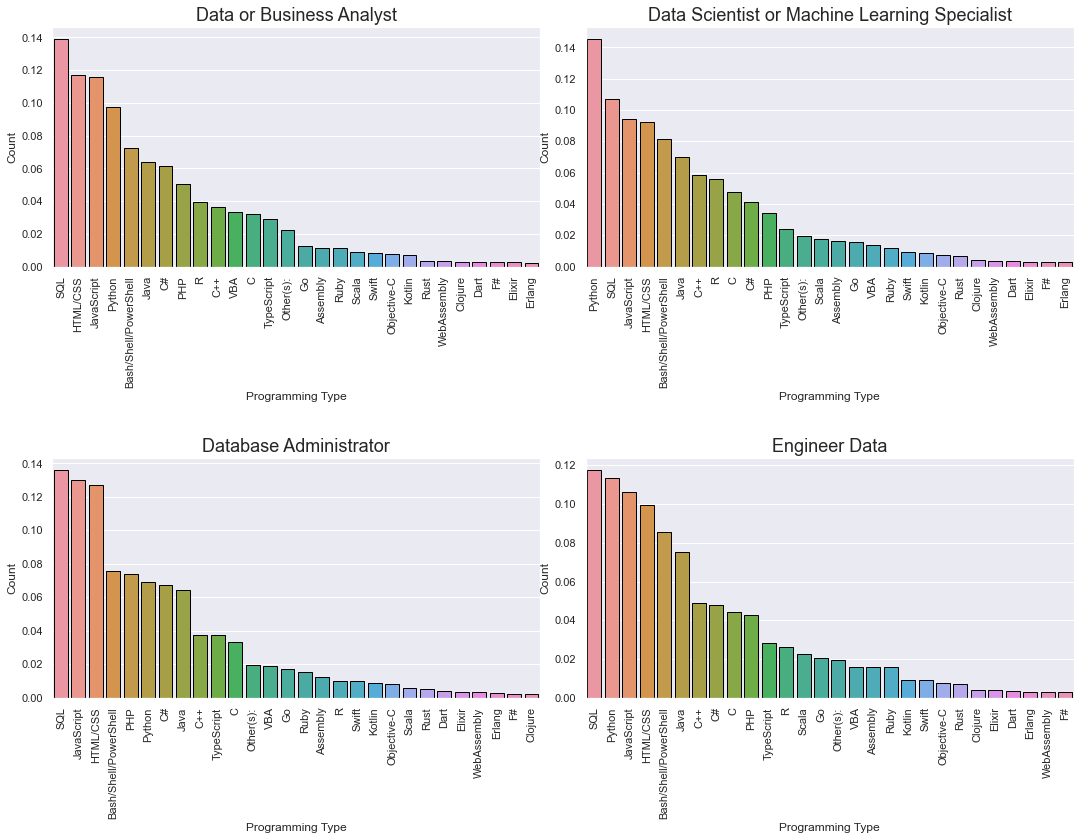

In [243]:
sns.set()
fig, axes = plt.subplots(2, 2,figsize=(15,10),sharey=False,sharex=False)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)
plt.tight_layout(h_pad=14.0)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
axes[0,0].set_title('Data or Business Analyst', fontsize=18)
sns.barplot(ax=axes[0,0],x=Data_business_analyst['Programming Type'],
            y=Data_business_analyst['Count']/sum(Data_business_analyst['Count']),
            data=Data_business_analyst,edgecolor='black')

axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
axes[0,1].set_title('Data Scientist or Machine Learning Specialist', fontsize=18)
sns.barplot(ax=axes[0,1],x=Data_scientist_machine_learning_specialist['Programming Type'],
            y=Data_scientist_machine_learning_specialist['Count']
            /sum(Data_scientist_machine_learning_specialist['Count']),
            data=Data_scientist_machine_learning_specialist,edgecolor='black')

axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
axes[1,0].set_title('Database Administrator', fontsize=18)
sns.barplot(ax=axes[1,0],x=Database_administrator['Programming Type'],
            y=Database_administrator['Count']/sum(Database_administrator['Count']),
            data=Database_administrator,edgecolor='black')

axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)
axes[1,1].set_title('Engineer Data', fontsize=18)
sns.barplot(ax=axes[1,1],x=Engineer_data['Programming Type'],
            y=Engineer_data['Count']/sum(Engineer_data['Count']),
            data=Engineer_data,edgecolor='black')

#plt.savefig("Data.jpeg",bbox_inches="tight")

#### This section consider the distribution for the language worked with and the one intended to work with

In [247]:
# This read the column for the language worked with.

lang_type=data1['LanguageWorkedWith'].value_counts().reset_index()
#lang_type

In [246]:
from collections import Counter
import functools, operator
def split_data(column_name1,column_name2,schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    newarray=[]
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        for i in range(len(desc)):
            newarray.append({desc[i].strip():schema[column_name2][index]})
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Lang Type', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False)
lang_df=split_data('index','LanguageWorkedWith',lang_type)
#lang_df

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Programming Language Worked With ')
plt.xticks(rotation=90)
sns.barplot(x=lang_df['Lang Type'], y=lang_df['Count']/sum(lang_df['Count']), data=lang_df,edgecolor='black')
#plt.savefig("foo.png",bbox_inches="tight")

In [270]:
# This read the column for the language desire to worked with.
lang_desire=data1['LanguageDesireNextYear'].value_counts().reset_index()
#lang_desire


In [271]:
from collections import Counter
import functools, operator
def split_data(column_name1,column_name2,schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    newarray=[]
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        for i in range(len(desc)):
            newarray.append({desc[i].strip():schema[column_name2][index]})
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Lang Desire', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False).reset_index().drop('index',axis=1)
lang_desire_df=split_data('index','LanguageDesireNextYear',lang_desire)
#lang_desire_df

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Programming Language Desire to Work With ')
plt.xticks(rotation=90)
sns.barplot(x=lang_desire_df['Lang Desire'], 
            y=lang_desire_df['Count']/sum(lang_desire_df['Count']), 
            data=lang_desire_df,edgecolor='black')

#### Plot for the distribution of the language worked with and language desire to worked with.¶

<ipython-input-241-d6b54bec1672>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90)
<ipython-input-241-d6b54bec1672>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 90)


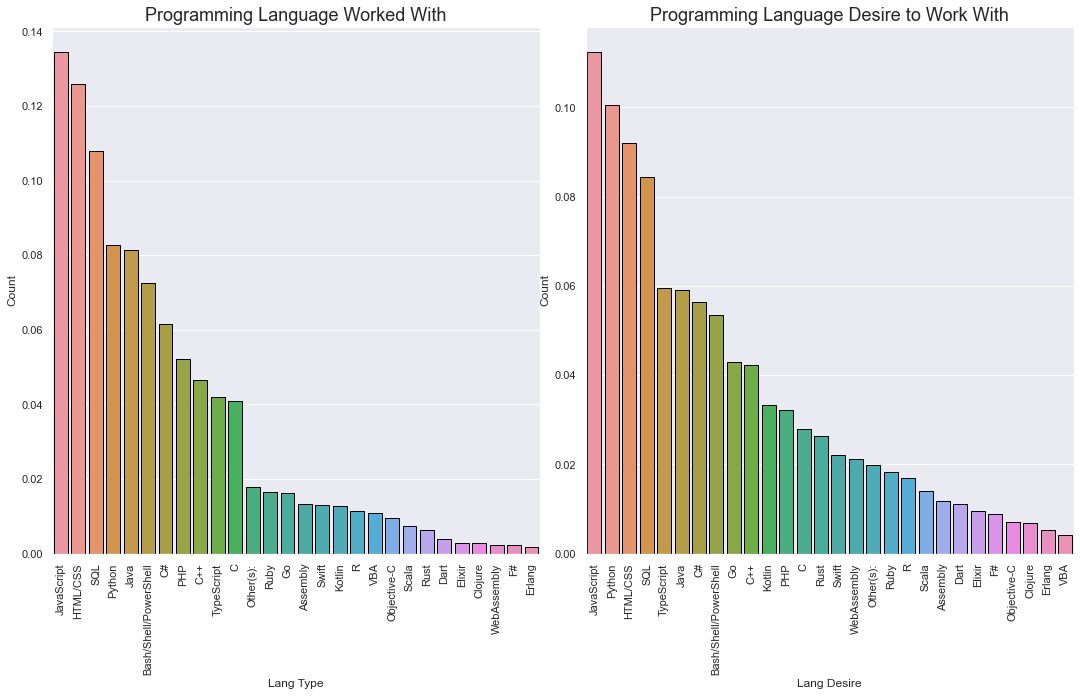

In [241]:
sns.set()
fig, axes = plt.subplots(1, 2,figsize=(15,8),sharey=False,sharex=False)

plt.tight_layout(h_pad=14.0)

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90)
axes[0].set_title('Programming Language Worked With', fontsize=18)
sns.barplot(ax=axes[0],x=lang_df['Lang Type'],
            y=lang_df['Count']/sum(lang_df['Count']),
            data=lang_df,edgecolor='black')

axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 90)
axes[1].set_title('Programming Language Desire to Work With', fontsize=18)
sns.barplot(ax=axes[1],x=lang_desire_df['Lang Desire'], 
            y=lang_desire_df['Count']/sum(lang_desire_df['Count']), 
            data=lang_desire_df,edgecolor='black')
#plt.savefig("LangType.jpeg",bbox_inches="tight")

#### This section consider the distribution for the Database worked with 

In [272]:
Database_work=data1['DatabaseWorkedWith'].value_counts().reset_index()
#Database_work

In [273]:
from collections import Counter
import functools, operator
def split_data(column_name1,column_name2,schema):
    
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    
    newarray=[]
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        for i in range(len(desc)):
            newarray.append({desc[i].strip():schema[column_name2][index]})
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Database', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False).reset_index().drop('index',axis=1)
Database_work_df=split_data('index','DatabaseWorkedWith',Database_work)
#Database_work_df

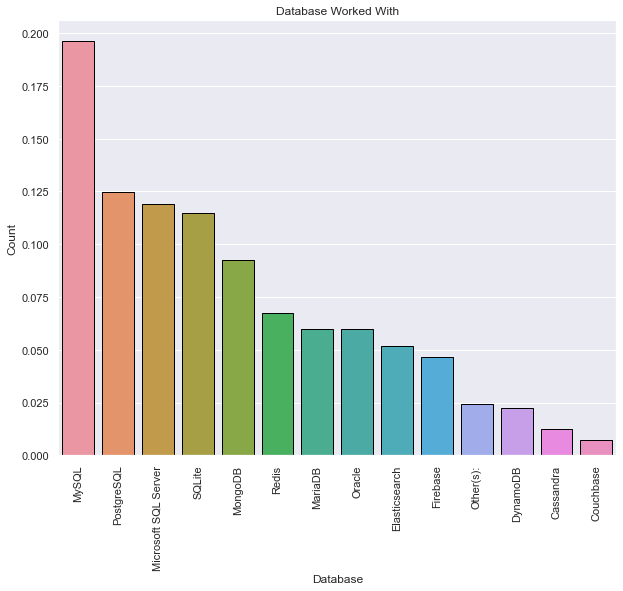

In [259]:
plt.figure(figsize=(10,8))
plt.title('Database Worked With')
plt.xticks(rotation=90)
sns.barplot(x=Database_work_df['Database'], 
            y=Database_work_df['Count']/sum(Database_work_df['Count']), 
            data=Database_work_df,edgecolor='black')
plt.savefig("Database.jpeg",bbox_inches="tight")

In [20]:
data2=pd.read_csv('survey_results_schema.csv', sep=",", header=0)
data2

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...
